In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv('advertising.csv')

### Exploratory Data Analysis

In [4]:
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [9]:
df.describe().round(3)

TV    Radio  Newspaper    Sales
count  200.000  200.000    200.000  200.000
mean   147.042   23.264     30.554   15.131
std     85.854   14.847     21.779    5.284
min      0.700    0.000      0.300    1.600
25%     74.375    9.975     12.750   11.000
50%    149.750   22.900     25.750   16.000
75%    218.825   36.525     45.100   19.050
max    296.400   49.600    114.000   27.000

In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.duplicated().sum()

0

Initial Impressions of the Dataset
1. 200 rows and 4 columns
2. No duplicated values
3. No null values

### Data Visualization

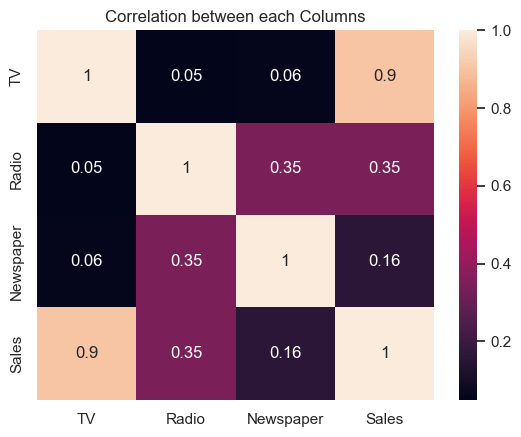

In [16]:
sns.heatmap(df.corr().round(2), annot=True)
plt.title('Correlation between each Columns')
plt.show()

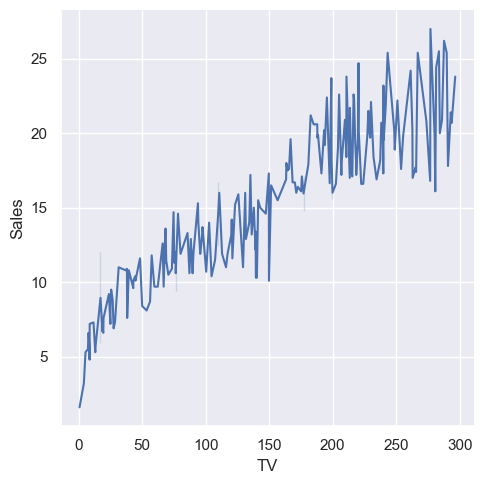

In [8]:
sns.set(style='darkgrid')
sns.relplot(data=df, x="TV", y="Sales", kind="line")

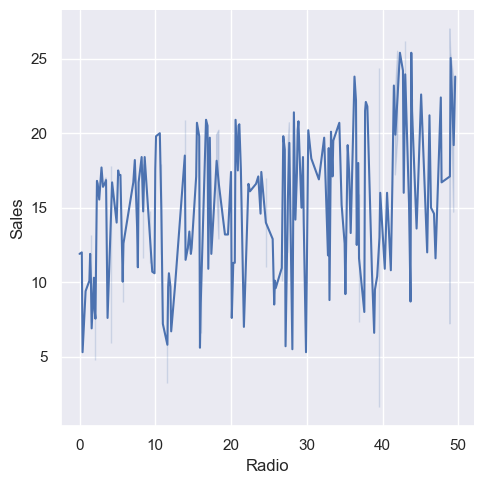

In [13]:
sns.set(style='darkgrid')
sns.relplot(data=df, x="Radio", y="Sales", kind="line")

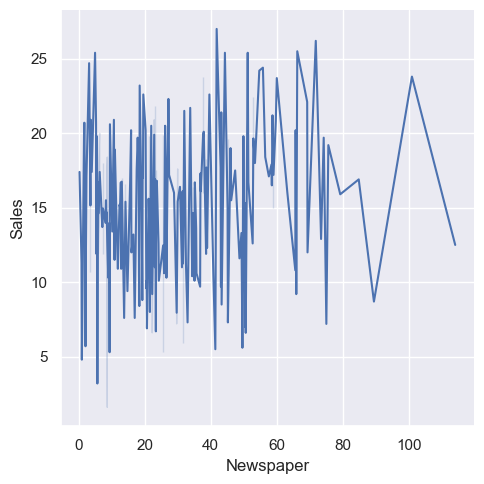

In [14]:
sns.set(style='darkgrid')
sns.relplot(data=df, x="Newspaper", y="Sales", kind="line")

### Pre-Processing the Data

In [17]:
scaled = MinMaxScaler().fit_transform(df)
df = pd.DataFrame(scaled, columns=df.columns)

### Training the Model

In [19]:
col = [c for c in df.columns.to_list() if c not in ['Sales']]
X = df[col]
Y = df['Sales']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.50, random_state=42)

In [ ]:
log = LinearRegression()
log.fit(X_train, Y_train)

In [ ]:
accuracy = accuracy_score(Y_test, log.predict(X_test))
precision = precision_score(Y_test, log.predict(X_test))
recall = recall_score(Y_test, log.predict(X_test))
f1 = f1_score(Y_test, log.predict(X_test))
conf_matrix = confusion_matrix(Y_test, log.predict(X_test))

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)